In [36]:
from headers import *
import sklearn.manifold as skl_manifold

In [37]:
FILE_DIR = "/home/tanmay/catkin_ws/src/Visualize_Primitives/Data/K2_Demos/Grid_Demo/"
num_images = npy.load(os.path.join(FILE_DIR,"Number_Images.npy"))

In [38]:
FILE_DIR = "/home/tanmay/catkin_ws/src/Visualize_Primitives/Data/K2_Demos/Grid_Demo/D{0}"

lhseg = [[] for i in range(10)]
rhseg = [[] for i in range(10)]

for i in range(10):
    lhseg[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"D{0}_LH_Seg_Indices.npy".format(i+1)))
    rhseg[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"D{0}_RH_Seg_Indices.npy".format(i+1)))

action_list = npy.array(['Null','Reach','Place','Return','Pour'])

In [39]:
hc3 = [[] for i in range(10)]
lh = [[] for i in range(10)]
rh = [[] for i in range(10)]
# lhs = [[] for i in range(10)]
# rhs = [[] for i in range(10)]

for i in range(10):
    hc3[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"Hand_Coordinates_3D.npy"))
    lh[i] = hc3[i][:,0,:]
    rh[i] = hc3[i][:,2,:]

In [40]:
numlhseg = 0
numrhseg = 0
for i in range(10):
    numlhseg += len(lhseg[i])-1
    numrhseg += len(rhseg[i])-1
numlhseg,numrhseg

(82, 79)

In [41]:
lhpos = [[] for i in range(numlhseg)]
rhpos = [[] for i in range(numrhseg)]

ctr = 0
for i in range(10):
    for j in range(len(lhseg[i])-1):
        print(ctr,i,lhseg[i][j],lhseg[i][j+1])
        lhpos[ctr] = lh[i][lhseg[i][j]:lhseg[i][j+1]]
        ctr +=1
ctr = 0
for i in range(10):
    for j in range(len(rhseg[i])-1):
        rhpos[ctr] = rh[i][rhseg[i][j]:rhseg[i][j+1]]
        ctr +=1 

(0, 0, 0, 53)
(1, 0, 53, 79)
(2, 0, 79, 109)
(3, 0, 109, 139)
(4, 0, 139, 178)
(5, 0, 178, 223)
(6, 0, 223, 235)
(7, 1, 0, 26)
(8, 1, 26, 79)
(9, 1, 79, 128)
(10, 1, 128, 158)
(11, 1, 158, 187)
(12, 1, 187, 222)
(13, 1, 222, 259)
(14, 1, 259, 290)
(15, 2, 0, 31)
(16, 2, 31, 58)
(17, 2, 58, 102)
(18, 2, 102, 132)
(19, 2, 132, 167)
(20, 2, 167, 192)
(21, 2, 192, 219)
(22, 2, 219, 250)
(23, 3, 0, 30)
(24, 3, 30, 62)
(25, 3, 62, 86)
(26, 3, 86, 115)
(27, 3, 115, 153)
(28, 3, 153, 189)
(29, 3, 189, 232)
(30, 3, 232, 240)
(31, 4, 0, 16)
(32, 4, 16, 40)
(33, 4, 40, 63)
(34, 4, 63, 90)
(35, 4, 90, 114)
(36, 4, 114, 156)
(37, 4, 156, 196)
(38, 4, 196, 220)
(39, 5, 0, 16)
(40, 5, 16, 38)
(41, 5, 38, 68)
(42, 5, 68, 100)
(43, 5, 100, 124)
(44, 5, 124, 157)
(45, 5, 157, 180)
(46, 5, 180, 212)
(47, 5, 212, 225)
(48, 6, 0, 25)
(49, 6, 25, 56)
(50, 6, 56, 76)
(51, 6, 76, 99)
(52, 6, 99, 119)
(53, 6, 119, 141)
(54, 6, 141, 168)
(55, 6, 168, 200)
(56, 7, 0, 15)
(57, 7, 15, 40)
(58, 7, 40, 75)
(59, 7, 7

In [42]:
rolltime = 100
lhdmp = [DMP(rolltime) for i in range(numlhseg)]
rhdmp = [DMP(rolltime) for i in range(numrhseg)]

for i in range(numlhseg):
    print(i)
    lhdmp[i].linear_interpolate(lhpos[i])
    lhdmp[i].initialize_variables()
    lhdmp[i].learn_DMP()

for i in range(numrhseg):
    print(i)
    rhdmp[i].linear_interpolate(rhpos[i])
    rhdmp[i].initialize_variables()
    rhdmp[i].learn_DMP()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78


In [43]:
nk = lhdmp[0].number_kernels
lhmetaw = npy.zeros((numlhseg,nk,3))
rhmetaw = npy.zeros((numrhseg,nk,3))

for i in range(numlhseg):
    lhmetaw[i] = lhdmp[i].weights
for i in range(numrhseg):
    rhmetaw[i] = rhdmp[i].weights

In [44]:
lhmetaw = lhmetaw.reshape(numlhseg,3*nk)
rhmetaw = rhmetaw.reshape(numrhseg,3*nk)

lhnotnan = []
rhnotnan = []

for i in range(numlhseg):
    if not(npy.isnan(lhmetaw[i]).any()):
        lhnotnan.append(i)
    
for i in range(numrhseg):
    if not(npy.isnan(rhmetaw[i]).any()):
        rhnotnan.append(i)
# lhnotnan = npy.where(npy.isfinite(lhmetaw))[0]
# rhnotnan = npy.where(npy.isfinite(rhmetaw))[0]
# len(rhnotnan)
len(lhnotnan),len(rhnotnan)

(80, 78)

In [45]:
num_cluster = 20

lhmetaw = lhmetaw[lhnotnan]
lhmetaw = lhmetaw.reshape(numlhseg-2,3*nk)
kmeans = KMeans(n_clusters = num_cluster,random_state=0).fit(lhmetaw)
model = skl_manifold.TSNE(n_components=2,random_state=0)
lhew = model.fit_transform(lhmetaw)

In [46]:
kmeans.labels_

array([ 0,  0,  0,  5,  0,  0,  0, 19,  0,  4,  0,  0,  0,  0,  0,  0,  0,
        8,  0,  3, 19,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 18, 16, 15,  0,  0, 10,  0, 18,  7,  0,  0,  0,  0,  2,  0,  0,
        0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 19, 17,
        0,  0,  0,  0, 13,  0, 12,  6,  0,  0, 14,  0], dtype=int32)

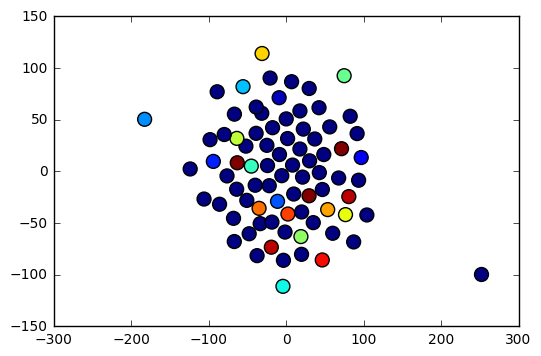

In [57]:
fig,ax = plt.subplots()
ax.scatter(lhew[:,0],lhew[:,1],c=kmeans.labels_,s=100)
plt.show()

In [49]:
num_cluster = 20

rhmetaw = rhmetaw[rhnotnan]
rhmetaw = rhmetaw.reshape(numrhseg-1,3*nk)
rhkmeans = KMeans(n_clusters = num_cluster,random_state=0).fit(rhmetaw)
rhmodel = skl_manifold.TSNE(n_components=2,random_state=0)
rhew = rhmodel.fit_transform(rhmetaw)

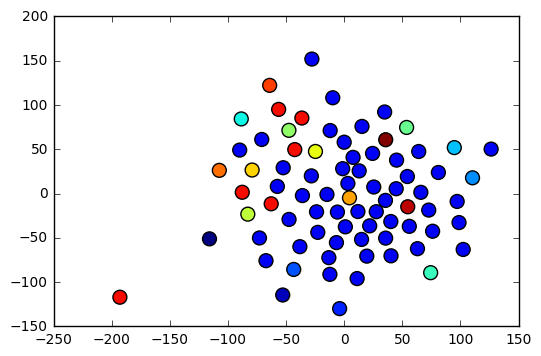

In [50]:
fig,ax = plt.subplots()
ax.scatter(rhew[:,0],rhew[:,1],c=rhkmeans.labels_,s=100)
plt.show()

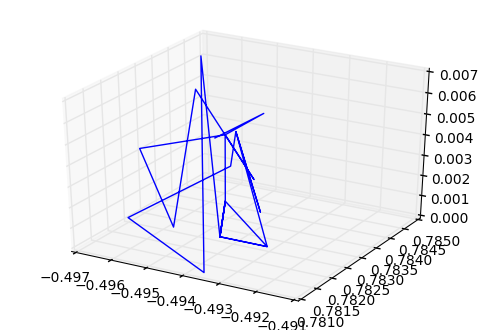

In [81]:
consider_seg = 17
fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
for i in range(numlhseg-2):
    if kmeans.labels_[i]==consider_seg:
        ax1.plot(lhpos[lhnotnan[i]][:,0],lhpos[lhnotnan[i]][:,1],lhpos[lhnotnan[i]][:,2])
plt.show()